In [205]:
import pandas as pd

In [207]:
file_path = "/Users/hnineikhaing/Desktop/cleaned_merged_data.csv"
df= pd.read_csv(file_path)
df

,date,road_name,location,suburb,speed_limit,direction,time,Light_Vehicles,Light_Vehicles_with_Trailer,Two_Axle_Trucks_Buses,...,status_id,seg_descr,poly_area,gisid,street_id,seg_part,Geo Shape x,Geo Shape y,Latitude,Longitude
0,2014-10-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,16:00,24.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
1,2014-10-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,17:00,42.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
2,2014-10-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,18:00,33.000000,0.386506,1.000000,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
3,2014-11-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,2:00,3.000000,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
4,2014-11-11,Wolseley Parade,North East Of Derby Street,Kensington,50,W,4:00,86.177384,0.386506,4.093996,...,2,Wolseley Parade between Bellair Street and Der...,5235,2301,1186,1,144.928291,-37.796994,-37.796238,144.929383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63115,2014-11-13,Tennyson Street,South West Of Southey Street,Kensington,50,W,12:00,4.000000,0.386506,1.000000,...,2,Tennyson Street between Southey Street and Ard...,1574,2289,1119,1,144.930478,-37.797832,-37.798036,144.929982
63116,2014-11-13,Tennyson Street,South West Of Southey Street,Kensington,50,W,13:00,6.000000,0.386506,4.093996,...,2,Tennyson Street between Southey Street and Ard...,1574,2289,1119,1,144.930478,-37.797832,-37.798036,144.929982
63117,2014-11-13,Tennyson Street,South West Of Southey Street,Kensington,50,W,14:00,6.000000,0.386506,1.000000,...,2,Tennyson Street between Southey Street and Ard...,1574,2289,1119,1,144.930478,-37.797832,-37.798036,144.929982
63118,2014-11-13,Tennyson Street,South West Of Southey Street,Kensington,50,W,16:00,8.000000,0.386506,1.000000,...,2,Tennyson Street between Southey Street and Ard...,1574,2289,1119,1,144.930478,-37.797832,-37.798036,144.929982


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63120 entries, 0 to 63119
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             63120 non-null  object 
 1   road_name                        63120 non-null  object 
 2   location                         63120 non-null  object 
 3   suburb                           63120 non-null  object 
 4   speed_limit                      63120 non-null  int64  
 5   direction                        63120 non-null  object 
 6   time                             63120 non-null  object 
 7   Light_Vehicles                   63120 non-null  float64
 8   Light_Vehicles_with_Trailer      63120 non-null  float64
 9   Two_Axle_Trucks_Buses            63120 non-null  float64
 10  Three_Axle_Trucks_Buses          63120 non-null  float64
 11  Four_Axle_Trucks                 63120 non-null  float64
 12  Three_Axle_Articul

In [140]:
# Sum all vehicles to get the total vehicle count
df['total_vehicles'] = df[
    ['Light_Vehicles', 'Light_Vehicles_with_Trailer', 'Two_Axle_Trucks_Buses', 
     'Three_Axle_Trucks_Buses', 'Four_Axle_Trucks', 'Three_Axle_Articulated_Vehicles', 
     'Four_Axle_Articulated_Vehicles', 'Five_Axle_Articulated_Vehicles', 
     'Six_Axle_Articulated_Vehicles', 'B_Double_Trucks', 'Double_Road_Trains', 
     'Triple_Road_Trains', 'Unknown_Vehicles', 'Motorcycles', 'Bicycles']
].sum(axis=1)

# Calculate the proportion of light vehicles
df['light_vehicle_ratio'] = (df['Light_Vehicles'] + df['Light_Vehicles_with_Trailer']) / df['total_vehicles']

# Calculate the proportion of heavy vehicles
df['heavy_vehicle_ratio'] = (
    df['Two_Axle_Trucks_Buses'] + df['Three_Axle_Trucks_Buses'] + df['Four_Axle_Trucks'] +
    df['Three_Axle_Articulated_Vehicles'] + df['Four_Axle_Articulated_Vehicles'] +
    df['Five_Axle_Articulated_Vehicles'] + df['Six_Axle_Articulated_Vehicles'] +
    df['B_Double_Trucks'] + df['Double_Road_Trains'] + df['Triple_Road_Trains']
) / df['total_vehicles']

# Display the first few rows to verify
print(df[['light_vehicle_ratio', 'heavy_vehicle_ratio']].head())


   light_vehicle_ratio  heavy_vehicle_ratio
0             0.711139             0.153454
1             0.810571             0.100632
2             0.830548             0.053940
3             0.254774             0.395894
4             0.897318             0.054549


In [142]:
# Function to categorize vehicle composition based on the ratios
def categorize_composition(row):
    if row['heavy_vehicle_ratio'] > 0.5:
        return 'Heavy Traffic'
    elif row['light_vehicle_ratio'] > 0.7:
        return 'Light Traffic'
    else:
        return 'Mixed Traffic'

# Apply the function to create the vehicle_composition column
df['vehicle_composition'] = df.apply(categorize_composition, axis=1)

# Check the distribution of the new column
print(df['vehicle_composition'].value_counts())


vehicle_composition
Light Traffic    36371
Mixed Traffic    26248
Heavy Traffic      501
Name: count, dtype: int64


In [144]:
# Display a few rows to verify the vehicle_composition
print(df[['light_vehicle_ratio', 'heavy_vehicle_ratio', 'vehicle_composition']].head())

# Analyze the distribution of vehicle composition categories
vehicle_composition_distribution = df['vehicle_composition'].value_counts(normalize=True) * 100
print("Vehicle Composition Distribution (%):")
print(vehicle_composition_distribution)


   light_vehicle_ratio  heavy_vehicle_ratio vehicle_composition
0             0.711139             0.153454       Light Traffic
1             0.810571             0.100632       Light Traffic
2             0.830548             0.053940       Light Traffic
3             0.254774             0.395894       Mixed Traffic
4             0.897318             0.054549       Light Traffic
Vehicle Composition Distribution (%):
vehicle_composition
Light Traffic    57.621990
Mixed Traffic    41.584284
Heavy Traffic     0.793726
Name: proportion, dtype: float64


In [146]:
# Defining the features$
features = ['speed_limit', 'average_speed', 'Latitude', 'Longitude', 'road_name', 'location', 'suburb', 'direction']

# Creating Target variable
target = 'vehicle_composition'

# Checking the data types of features and handle any categorical variables
print(df[features].dtypes)


speed_limit        int64
average_speed    float64
Latitude         float64
Longitude        float64
road_name         object
location          object
suburb            object
direction         object
dtype: object


In [148]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical and numerical features
categorical_features = ['road_name', 'location', 'suburb', 'direction']
numerical_features = ['speed_limit', 'average_speed', 'Latitude', 'Longitude']

# Apply OneHotEncoder to categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])

# Combine numerical and encoded categorical features
import numpy as np
X = np.hstack((df[numerical_features].values, encoded_features))

# Target variable
y = df[target].values

# Check the shapes of X and y
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')


Features shape: (63120, 267)
Target shape: (63120,)


In [156]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing target shape: {y_test.shape}')


Training features shape: (50496, 267)
Testing features shape: (12624, 267)
Training target shape: (50496,)
Testing target shape: (12624,)


In [158]:
from sklearn.linear_model import LogisticRegression

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced')
# Train the model
model.fit(X_train, y_train)

print("Model coefficients:", model.coef_)

Model coefficients: [[-1.29143794e-02 -1.02636459e-01 -9.61018285e-04  1.78700919e-02
  -5.04055401e-01  7.70790862e-01 -4.22595490e-01 -3.71932187e-01
   1.05854103e+00 -2.73297730e-01  8.29981193e-01 -7.43464292e-01
   1.07497842e-01 -3.75356170e-01  2.25379531e-01  3.35771679e-01
  -4.03624785e-01 -1.32412141e-01 -7.25124845e-01  3.15507719e-01
   1.16788306e+00  8.76561881e-01  6.69653892e-01 -4.11646868e-01
   4.50978767e-01  7.57857306e-01 -5.95933850e-02  1.02069832e+00
   8.60230930e-02  9.27632997e-01  6.63152971e-01 -5.76403648e-01
  -1.26949129e-01 -2.53384210e-01  6.66063795e-01 -1.72233627e-01
  -1.11136425e+00  5.38419122e-01  7.99587912e-01 -4.77300224e-01
  -8.66035443e-01  3.89273784e-01 -5.88488705e-01 -3.46729224e-01
  -4.90963544e-01 -2.19184968e-01 -4.78570194e-01 -3.99925939e-01
   1.16245218e-01 -1.00302477e+00 -4.89814450e-01 -2.00615811e-01
   7.84936200e-01  2.55055944e-01  6.00188541e-01  3.76957439e-01
   9.40339671e-02  1.02681375e+00 -1.12360483e+00 -4.577

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
# Predict vehicle compositions on the test set
y_pred = model.predict(X_test)


In [162]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train the logistic regression model on the scaled data
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [163]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

Heavy Traffic       0.03      0.81      0.07        97
Light Traffic       0.80      0.67      0.73      7240
Mixed Traffic       0.63      0.50      0.56      5287

     accuracy                           0.60     12624
    macro avg       0.49      0.66      0.45     12624
 weighted avg       0.72      0.60      0.65     12624

Confusion Matrix:
[[  79    9    9]
 [ 808 4861 1571]
 [1388 1242 2657]]


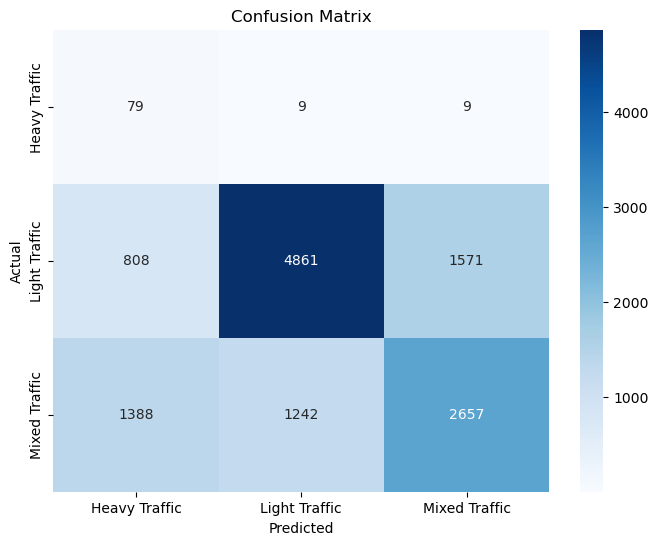

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [168]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the scaled data
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.73376238 0.73561739 0.73730072 0.73848896 0.73631053]
Average cross-validation score: 0.7362959944078377


In [169]:
import pandas as pd

# Take a subset of the test data (first 5 rows for demonstration)
subset = X_test_scaled[:5]
actual_compositions = y_test[:5]

# Predict the probability distribution for each vehicle composition
predicted_probs = model.predict_proba(subset)

# Create a DataFrame to display the results
probs_df = pd.DataFrame(predicted_probs, columns=model.classes_)
probs_df['Actual Composition'] = actual_compositions

# Display the probability distribution along with actual classes
print(probs_df)


   Heavy Traffic  Light Traffic  Mixed Traffic Actual Composition
0       0.000002       0.863961       0.136036      Mixed Traffic
1       0.000042       0.895697       0.104262      Light Traffic
2       0.000043       0.999952       0.000005      Light Traffic
3       0.000046       0.728718       0.271236      Mixed Traffic
4       0.000013       0.999984       0.000003      Light Traffic


In [170]:
# Testing on rows 10 to 15 of the test set
subset = X_test_scaled[10:15]
actual_compositions = y_test[10:15]

# Predict the probability distribution for this subset
predicted_probs = model.predict_proba(subset)

# Create a DataFrame to display the results
probs_df = pd.DataFrame(predicted_probs, columns=model.classes_)
probs_df['Actual Composition'] = actual_compositions

# Display the probability distribution along with actual classes
print(probs_df)


   Heavy Traffic  Light Traffic  Mixed Traffic Actual Composition
0       0.066570       0.333368       0.600062      Mixed Traffic
1       0.000029       0.194368       0.805604      Mixed Traffic
2       0.000087       0.189673       0.810241      Mixed Traffic
3       0.000046       0.550835       0.449119      Light Traffic
4       0.000100       0.844199       0.155702      Light Traffic


In [186]:
# Testing on the last 5 rows of the test set
subset = X_test_scaled[-5:]
actual_compositions = y_test[-5:]

# Predict the probability distribution for this subset
predicted_probs = model.predict_proba(subset)

# Create a DataFrame to display the results
probs_df = pd.DataFrame(predicted_probs, columns=model.classes_)
probs_df['Actual Composition'] = actual_compositions

# Display the probability distribution along with actual classes
print(probs_df)


   Heavy Traffic  Light Traffic  Mixed Traffic Actual Composition
0       0.028757       0.148906       0.822337      Mixed Traffic
1       0.000012       0.975957       0.024031      Light Traffic
2       0.010151       0.656182       0.333668      Light Traffic
3       0.006916       0.374662       0.618422      Light Traffic
4       0.002019       0.634784       0.363197      Light Traffic


In [195]:
# Example new data (replace with actual values for each feature)
# [speed_limit, average_speed, latitude, longitude, light_vehicle_ratio, heavy_vehicle_ratio]
new_data = [[60, 50, -37.814, 144.963, 0.4, 0.2]]  # Example of a new traffic scenario


In [213]:
# Print all the columns in the DataFrame
print(df.columns)


Index(['date', 'road_name', 'location', 'suburb', 'speed_limit', 'direction',
       'time', 'Light_Vehicles', 'Light_Vehicles_with_Trailer',
       'Two_Axle_Trucks_Buses', 'Three_Axle_Trucks_Buses', 'Four_Axle_Trucks',
       'Three_Axle_Articulated_Vehicles', 'Four_Axle_Articulated_Vehicles',
       'Five_Axle_Articulated_Vehicles', 'Six_Axle_Articulated_Vehicles',
       'B_Double_Trucks', 'Double_Road_Trains', 'Triple_Road_Trains',
       'Unknown_Vehicles', 'Motorcycles', 'Bicycles', 'average_speed',
       '85th_percentile_speed', 'maximum_speed', 'road_segment', 'seg_id',
       'str_type', 'dtupdate', 'status_id', 'seg_descr', 'poly_area', 'gisid',
       'street_id', 'seg_part', 'Geo Shape x', 'Geo Shape y', 'Latitude',
       'Longitude'],
      dtype='object')


In [217]:
# Example: Recreate 'vehicle_composition' based on some conditions (adjust to your case)
# You may have defined vehicle composition based on traffic types or a combination of vehicle columns.
df['vehicle_composition'] = pd.cut(df['average_speed'], 
                                   bins=[0, 30, 60, 100], 
                                   labels=['Heavy Traffic', 'Mixed Traffic', 'Light Traffic'])


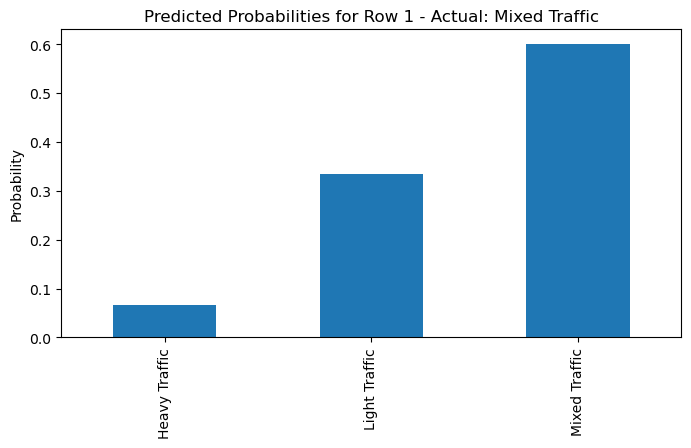

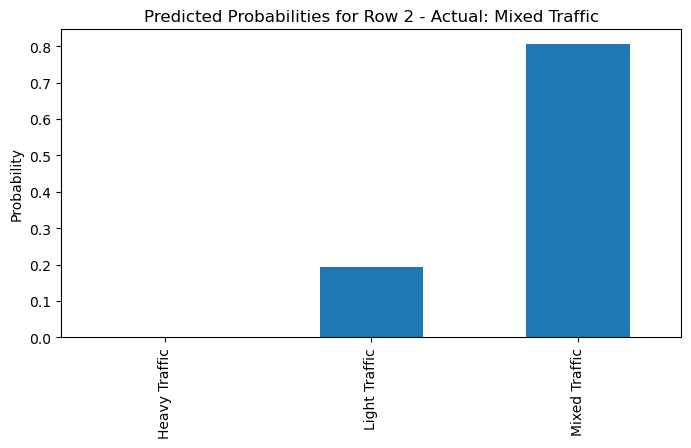

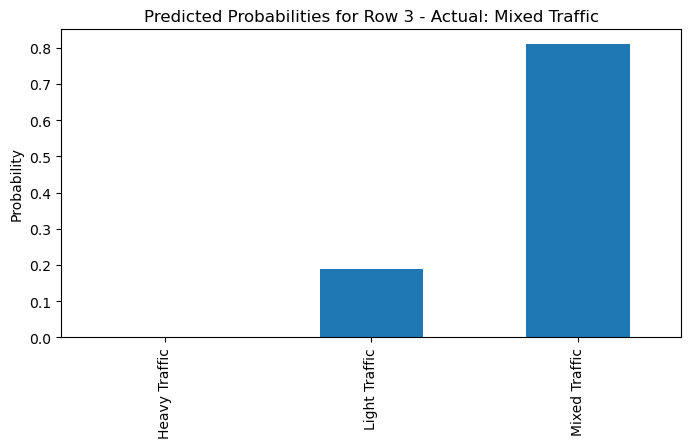

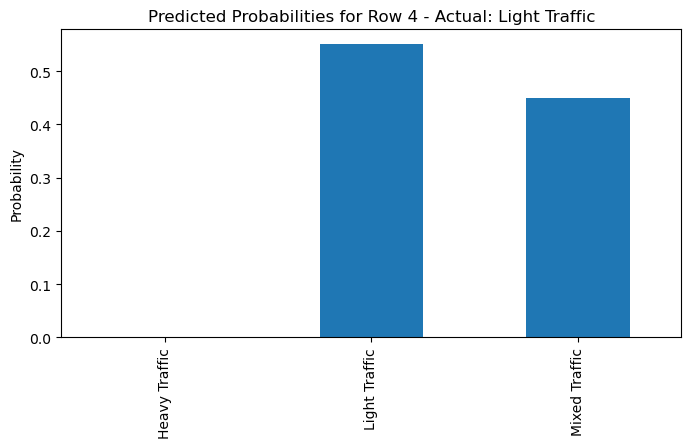

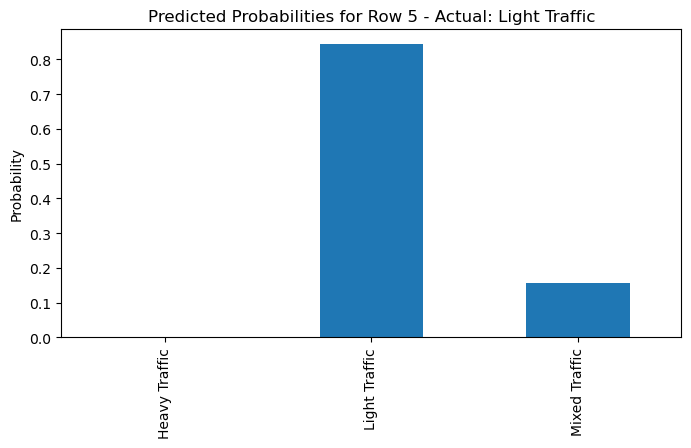

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

# Test predictions on a subset of test data
subset = X_test_scaled[10:15]  # Testing on a small subset
actual_compositions = y_test[10:15]  # This is likely a numpy array or list, so no need for `.values`

# Predict the probability distribution for this subset
predicted_probs = model.predict_proba(subset)

# Create a DataFrame to display the results
probs_df = pd.DataFrame(predicted_probs, columns=model.classes_)
probs_df['Actual Composition'] = actual_compositions  # No need for .values

# Visualize the probability distribution for each row
for i in range(len(probs_df)):
    probs_df.iloc[i, :-1].plot(kind='bar', figsize=(8, 4))
    plt.title(f'Predicted Probabilities for Row {i+1} - Actual: {probs_df["Actual Composition"].iloc[i]}')
    plt.ylabel('Probability')
    plt.show()


In [235]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, model.predict(X_test_scaled), target_names=model.classes_))


               precision    recall  f1-score   support

Heavy Traffic       1.00      0.01      0.02        97
Light Traffic       0.76      0.79      0.77      7240
Mixed Traffic       0.69      0.66      0.67      5287

     accuracy                           0.73     12624
    macro avg       0.81      0.49      0.49     12624
 weighted avg       0.73      0.73      0.72     12624



In [255]:
# Testing on rows 50 to 55 of the test set
subset = X_test_scaled[50:55]
actual_compositions = y_test[50:55]

# Predict the probability distribution for this subset
predicted_probs = model.predict_proba(subset)

# Create a DataFrame to display the results
probs_df = pd.DataFrame(predicted_probs, columns=model.classes_)
probs_df['Actual Composition'] = actual_compositions

# Display the probability distribution along with actual classes
print(probs_df)


   Heavy Traffic  Light Traffic  Mixed Traffic Actual Composition
0       0.000062       0.361548       0.638390      Light Traffic
1       0.004132       0.274873       0.720995      Light Traffic
2       0.000125       0.372711       0.627165      Mixed Traffic
3       0.000049       0.945645       0.054305      Light Traffic
4       0.027270       0.337151       0.635579      Mixed Traffic


In [247]:
X = df.drop(columns=['vehicle_composition'])  # where 'target_column' is the name of your target variable
y = df['vehicle_composition']


In [249]:
print(X.columns)  # Assuming X is the unscaled feature set


Index(['date', 'road_name', 'location', 'suburb', 'speed_limit', 'direction',
       'time', 'Light_Vehicles', 'Light_Vehicles_with_Trailer',
       'Two_Axle_Trucks_Buses', 'Three_Axle_Trucks_Buses', 'Four_Axle_Trucks',
       'Three_Axle_Articulated_Vehicles', 'Four_Axle_Articulated_Vehicles',
       'Five_Axle_Articulated_Vehicles', 'Six_Axle_Articulated_Vehicles',
       'B_Double_Trucks', 'Double_Road_Trains', 'Triple_Road_Trains',
       'Unknown_Vehicles', 'Motorcycles', 'Bicycles', 'average_speed',
       '85th_percentile_speed', 'maximum_speed', 'road_segment', 'seg_id',
       'str_type', 'dtupdate', 'status_id', 'seg_descr', 'poly_area', 'gisid',
       'street_id', 'seg_part', 'Geo Shape x', 'Geo Shape y', 'Latitude',
       'Longitude'],
      dtype='object')
